# Zad 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import log
from math import cos
from math import sin
from math import exp
from math import factorial
from itertools import product
from numpy.linalg import solve
from numpy import poly1d
import scipy
from scipy.interpolate import lagrange

# a)

In [3]:
def simpsonMethod(f, a, b):
    return (b - a) / 6 * (f(a) + 4 * f((a + b) / 2) + f(b))
  
maxDegree = 5
a = 0
b = 10

for i in range(maxDegree + 1):
    print("całka z x **", i)
    f = lambda x: x ** (i + 1)
    print("wynik podejścia analitycznego:", 1 / (i + 1) * f(b) - 1 / (i + 1) * f(a))
    print("wynik wykorzystania metody Simpsona:", simpsonMethod(lambda x: x ** (i), a, b))
    print("----------")


całka z x ** 0
wynik podejścia analitycznego: 10.0
wynik wykorzystania metody Simpsona: 10.0
----------
całka z x ** 1
wynik podejścia analitycznego: 50.0
wynik wykorzystania metody Simpsona: 50.0
----------
całka z x ** 2
wynik podejścia analitycznego: 333.3333333333333
wynik wykorzystania metody Simpsona: 333.33333333333337
----------
całka z x ** 3
wynik podejścia analitycznego: 2500.0
wynik wykorzystania metody Simpsona: 2500.0
----------
całka z x ** 4
wynik podejścia analitycznego: 20000.0
wynik wykorzystania metody Simpsona: 20833.333333333336
----------
całka z x ** 5
wynik podejścia analitycznego: 166666.66666666666
wynik wykorzystania metody Simpsona: 187500.0
----------


Od jednomianu stopnia zerowego do stopnia trzeciego włącznie wartość
kwadratury Simpsona pokrywa się z obliczeniami analitycznymi. Od czwartego
stopnia metoda przestaje być dokładna i następują rozbieżności wyników.

# b)

In [4]:
a = 0
b = 5

oneIntervalResult = simpsonMethod(lambda x: exp(-3 * x) * sin(4 * x), a, b)

a = 0
b = 1
c = 5

twoIntervalResult = simpsonMethod(lambda x: exp(-3 * x) * sin(4 * x), a, b) + simpsonMethod(lambda x: exp(-3 * x) * sin(4 * x), b, c)

print("wynik z jednym przedziałem:", oneIntervalResult)
print("wynik z podzieleniem na dwa przedziały", twoIntervalResult)


wynik z jednym przedziałem: -0.0010027325181523323
wynik z podzieleniem na dwa przedziały 0.10368557622593552


Wyniki różnią się, ponieważ, jak widać na wykresie w pp. c) w przedziale [0, 1] występują odchylenia funkcji, a [1, 5] są one prawie niewidoczne. Wykorzystując metodę Simpsona na całym zadanym przedziale, wartości paraboli interpolującej funkcję są bliskie 0, więc wartość całki z paraboli (pole pod wykresem) będąca przybliżeniem funkcji jest mała.
Natomiast gdy przedział rozbijemy na dwa zadane: [0, 1], [1, 5], to zwłaszcza na tym pierwszym, funkcja osiąga znacznie większe wartości, dlatego całka z paraboli interpolującej funkcję na [0, 1] będzie większa i to głównie ona powoduje rozbieżność wyników.

# c)

kwadratura wielomianu inerpolującego: -0.0010027325181523321


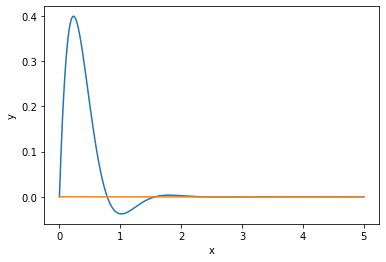

In [5]:
a = 0
b = 5

# wyznaczenie wielomianu interpolującego
xNodes = np.linspace(a, b, 3)
yNodes = [(lambda x: exp(-3 * x) * sin(4 * x))(x) for x in xNodes]
polynomial = lagrange(xNodes, yNodes)
 
args = np.linspace(a, b, 1000)
values = [(lambda x: exp(-3 * x) * sin(4 * x))(x) for x in args]
yNodes = [polynomial(x) for x in args]

plt.plot(args, values)
plt.plot(args, yNodes)
plt.xlabel('x')
plt.ylabel('y')
plt.show

print("kwadratura wielomianu inerpolującego:", simpsonMethod(polynomial, a, b))

Kwadratura wyliczonego wielomianu interpolującego jest równa wcześniej wyliczonej wartości ze wzoru (funkcji simpsonMethod).
Wielomian interpolujący jest związany z metodą Simpsona: chcąc przybliżyć całkę oznaczoną danej funkcji f na przedziale [a, b], należy wziąc trzy równoodległe węzły na tym przedziale, a następnie scałkować parabolę P, przez te węzły przechodzącą. Obliczona całka jest szukanym przybliżeniem.

$$\int_{a}^{b} f(x) dx \approx \int_{a}^{b} P(x) dx$$

# Zad 2

Kwadratura adaptacyjna polega na tym, że tak długo dzielimy przedział na pół, aż różnica sumy kwadratur po podziale i sumy kwadratur przed podziałem będzie mniejsza niż piętnastokrotność zadanej dokładności.

# a)

In [6]:
epsilon = 0.01

def adaptQuadrature(epsilon, f, a, b, numOfIntervals, prevValue):
    currentValue = 0
    intervals = np.linspace(a, b, numOfIntervals + 1)
    for i in range(numOfIntervals):
        currentValue += simpsonMethod(f, intervals[i], intervals[i + 1])
    
    # przy pierwszym wywołaniu funkcji nie sprawdzam różnicy 
    if numOfIntervals != 1:
        if abs(currentValue - prevValue) < 15 * epsilon:
            return (currentValue, intervals)
    
    return adaptQuadrature(epsilon, f, a, b, 2 * numOfIntervals, currentValue)
        
    
# funkcje wywołuję po raz pierwszy z parametrem numOfIntervals ustawionym na 1,
# prevValue może być zainicjowana dowolnie, nie jest ona używana w pierwszym wywołaniu funkcji
(value, _) = adaptQuadrature(epsilon, lambda x: exp(-3 * x) * sin(4 * x), 0, 5, 1, 0)
print("Kwadratura dla epsilon =", epsilon, ":", value)

epsilon = 0.001
(value, _) = adaptQuadrature(epsilon, lambda x: exp(-3 * x) * sin(4 * x), 0, 5, 1, 0)
print("Kwadratura dla epsilon =", epsilon, ":", value)

Kwadratura dla epsilon = 0.01 : -0.03782275644650306
Kwadratura dla epsilon = 0.001 : 0.15982397029661308


# b)

<function matplotlib.pyplot.show(close=None, block=None)>

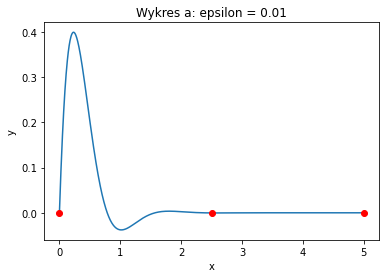

In [7]:
# epsilon = 0.01
epsilon = 0.01
(_, xNodes) = adaptQuadrature(epsilon, lambda x: exp(-3 * x) * sin(4 * x), 0, 5, 1, 0)
args = np.linspace(a, b, 1000)
values = [(lambda x: exp(-3 * x) * sin(4 * x))(x) for x in args]
yNodes = [(lambda x: exp(-3 * x) * sin(4 * x))(x) for x in xNodes]

plt.plot(args, values)
plt.plot(xNodes, yNodes, 'ro')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Wykres a: epsilon = 0.01")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

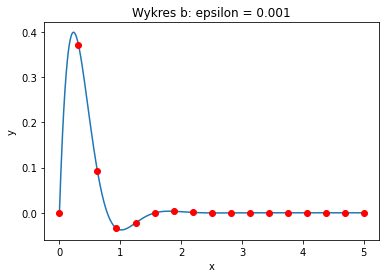

In [8]:
# epsilon = 0.001
epsilon = 0.001
(_, xNodes) = adaptQuadrature(epsilon, lambda x: exp(-3 * x) * sin(4 * x), 0, 5, 1, 0)
args = np.linspace(a, b, 1000)
values = [(lambda x: exp(-3 * x) * sin(4 * x))(x) for x in args]
yNodes = [(lambda x: exp(-3 * x) * sin(4 * x))(x) for x in xNodes]

plt.plot(args, values)
plt.plot(xNodes, yNodes, 'ro')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Wykres b: epsilon = 0.001")
plt.show

Przy zadanej dokładności epsilon = 0.01, kwadratura adaptacyjna dzieli przedział [a, b] na 2 podprzedziały,
zaprezentowane symbolicznie na funkcji f (wykres a). Po zmianie dokładności na 0.001, przedział jest dzielony
na 16 podprzedziałów (wykres b) i zwiększana jest dokładność obliczanej kwadratury.

# Zad 3

# a)

<function matplotlib.pyplot.show(close=None, block=None)>

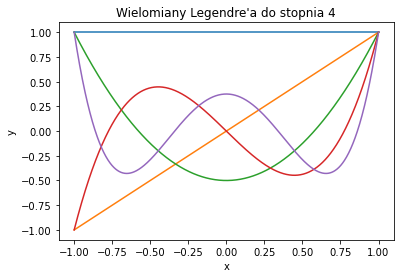

In [9]:
def P(k):
    if k == 0:
        return np.poly1d([1])
    if k == 1:
        return np.poly1d([1, 0])
    
    comp1 = ((2 * k - 1) / k) * np.poly1d([1, 0]) * P(k - 1)
    comp2 = (k - 1) / k * P(k - 2)
    
    return comp1 - comp2

args = np.linspace(-1, 1, 1000)
for i in range(5):
    f = P(i)
    plt.plot(args, [f(x) for x in args])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title("Wielomiany Legendre'a do stopnia 4")
plt.show

# b)

In [10]:
for i in range(2, 5):
    print("Węzły wielomianu ortogonalnego", i, "stopnia, wyliczone z wykorzystaniem numpy.poly1d.r:", P(i).r)
    print("Odcięte punktów Gaussa, wyliczone z wykorzystaniem scipy.special.roots_legendre", scipy.special.roots_legendre(i))
    print("----------")
    
print("węzły są sobie równe")

Węzły wielomianu ortogonalnego 2 stopnia, wyliczone z wykorzystaniem numpy.poly1d.r: [ 0.57735027 -0.57735027]
Odcięte punktów Gaussa, wyliczone z wykorzystaniem scipy.special.roots_legendre (array([-0.57735027,  0.57735027]), array([1., 1.]))
----------
Węzły wielomianu ortogonalnego 3 stopnia, wyliczone z wykorzystaniem numpy.poly1d.r: [ 0.77459667 -0.77459667  0.        ]
Odcięte punktów Gaussa, wyliczone z wykorzystaniem scipy.special.roots_legendre (array([-0.77459667,  0.        ,  0.77459667]), array([0.55555556, 0.88888889, 0.55555556]))
----------
Węzły wielomianu ortogonalnego 4 stopnia, wyliczone z wykorzystaniem numpy.poly1d.r: [-0.86113631  0.86113631 -0.33998104  0.33998104]
Odcięte punktów Gaussa, wyliczone z wykorzystaniem scipy.special.roots_legendre (array([-0.86113631, -0.33998104,  0.33998104,  0.86113631]), array([0.34785485, 0.65214515, 0.65214515, 0.34785485]))
----------
węzły są sobie równe


# c)

Podstawowe twierdzenie kwadratur Gaussa mówi, że odciętę n-punktowej kwadratury Gaussa są miejscami zerowymi wielomianu ortogonalnego dla jednego przedziału i tej samej funkcji ważącej, wyniki w podpunkcie b) zachowują się tak jak można przewidywać na podstawie tego twierdzenia.

# Zad 4

In [11]:
def gaussianQuadrature(f, k):
    (nodes, ACoeff) = scipy.special.roots_legendre(k)
    acc = 0
    for i in range(k):
        acc += f(nodes[i]) * ACoeff[i]
        
    return acc

maxDegree = 10
a = -1
b = 1
k = 3

for i in range(maxDegree + 1):
    print("całka z x **", i)
    f = lambda x: x ** (i + 1)
    print("wynik podejścia analitycznego:", 1 / (i + 1) * f(b) - 1 / (i + 1) * f(a))
    print("wynik wykorzystania kwadratury Gaussa:", gaussianQuadrature(lambda x: x ** (i), k))
    print("----------")    

całka z x ** 0
wynik podejścia analitycznego: 2.0
wynik wykorzystania kwadratury Gaussa: 1.9999999999999996
----------
całka z x ** 1
wynik podejścia analitycznego: 0.0
wynik wykorzystania kwadratury Gaussa: 0.0
----------
całka z x ** 2
wynik podejścia analitycznego: 0.6666666666666666
wynik wykorzystania kwadratury Gaussa: 0.666666666666667
----------
całka z x ** 3
wynik podejścia analitycznego: 0.0
wynik wykorzystania kwadratury Gaussa: 0.0
----------
całka z x ** 4
wynik podejścia analitycznego: 0.4
wynik wykorzystania kwadratury Gaussa: 0.40000000000000013
----------
całka z x ** 5
wynik podejścia analitycznego: 0.0
wynik wykorzystania kwadratury Gaussa: 0.0
----------
całka z x ** 6
wynik podejścia analitycznego: 0.2857142857142857
wynik wykorzystania kwadratury Gaussa: 0.24000000000000013
----------
całka z x ** 7
wynik podejścia analitycznego: 0.0
wynik wykorzystania kwadratury Gaussa: 0.0
----------
całka z x ** 8
wynik podejścia analitycznego: 0.2222222222222222
wynik wykorz

Twierdzenie o stopniu dokładności kwadratury Gaussa mówi, że gdy użyjemy wielomianu q, o n + 1 miejscach zerowych, to przybliżenie będzie dokładne dla wielomianów stopnia 2 * n + 1. Pokrywa się to z rezultatami obliczeń, przykładowo dla k = 3, przybliżenie powinno nie być dokładne dla wielomianu stopnia większego niż 5. Powyższe obliczenia wskazują, że tak jest.

# Zad 5

In [14]:
def normalizeGaussianQuadrature(f, a, b, k):
    F = lambda x: f( (b + a) / 2 + (b - a) / 2 * x )
    
    return gaussianQuadrature(F, k) * (b - a) / 2
    
a = -5
b = 5
k = 3

print("obliczenie całki od -5 do 5 z x ** 2:")
print("analitycznie:", 1 / 3 * (5 ** 3 + 5 ** 3))
print("użycie metody Gaussa po normalizacji:", normalizeGaussianQuadrature(lambda x: x ** 2, a, b, k))

obliczenie całki od -5 do 5 z x ** 2:
analitycznie: 83.33333333333333
użycie metody Gaussa po normalizacji: 83.33333333333336
